<a href="https://colab.research.google.com/github/fatemehm/Federated-Learning-IDS/blob/main/Wustl_ECU_ICU_Centralized_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Centralized-WUSTL-EHMS-2020***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
df_uni = pd.read_csv('/content/drive/MyDrive/GlobeCom/clean_wustl.csv')
shape = df_uni.shape
print('Dataframe shape: ', shape)
print('Number of rows: ', shape[0])
print('Number of columns: ', shape[1])

Dataframe shape:  (16315, 37)
Number of rows:  16315
Number of columns:  37


In [ ]:
df_uni.Label.value_counts()

0    14269
1     2046
Name: Label, dtype: int64

In [ ]:
drop_columns = ['Unnamed: 0']#, 'Flgs','SrcAddr',	'DstAddr', 'Dport', 'SrcMac',	'DstMac',	'Packet_num']		
df_uni= df_uni.drop(columns=drop_columns)
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16315 entries, 0 to 16314
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sport       16315 non-null  float64
 1   SrcBytes    16315 non-null  float64
 2   DstBytes    16315 non-null  float64
 3   SrcLoad     16315 non-null  float64
 4   DstLoad     16315 non-null  float64
 5   SrcGap      16315 non-null  float64
 6   DstGap      16315 non-null  float64
 7   SIntPkt     16315 non-null  float64
 8   DIntPkt     16315 non-null  float64
 9   SIntPktAct  16315 non-null  float64
 10  DIntPktAct  16315 non-null  float64
 11  SrcJitter   16315 non-null  float64
 12  DstJitter   16315 non-null  float64
 13  sMaxPktSz   16315 non-null  float64
 14  dMaxPktSz   16315 non-null  float64
 15  sMinPktSz   16315 non-null  float64
 16  dMinPktSz   16315 non-null  float64
 17  Dur         16315 non-null  float64
 18  Trans       16315 non-null  float64
 19  TotPkts     16315 non-nul

In [ ]:
X_uni = df_uni.drop('Label', axis = 1)
y_uni = df_uni['Label']
X_uni.shape, y_uni.shape

((16315, 35), (16315,))

In [ ]:
from imblearn.over_sampling import SMOTE
X_uni_smote, y_uni_smote = SMOTE().fit_resample(X_uni, y_uni)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
X_uni_train, X_uni_test, y_uni_train, y_uni_test = train_test_split(X_uni_smote, y_uni_smote, test_size=0.2, random_state = 1337)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X_uni_train = scaling.fit_transform(X_uni_train)
X_uni_test = scaling.transform(X_uni_test)

In [ ]:
#For CNN and CNN-LSTM
X_uni_train = X_uni_train.reshape(X_uni_train.shape[0], X_uni_train.shape[1], 1)
X_uni_test = X_uni_test.reshape(X_uni_test.shape[0], X_uni_test.shape[1], 1)

**LSTM**

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding
from tensorflow.keras import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import numpy as np
import time
import time
start = time.time()
#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_shape = X_uni_train[0].shape))  
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
   
model.fit(X_uni_train, y_uni_train, epochs=100, batch_size = 1024, validation_data=(X_uni_test, y_uni_test), verbose=1)
    
print(model.evaluate(X_uni_test, y_uni_test))
    
y_preds_cnn = model.predict(X_uni_test)
y_preds_cnn = np.round(y_preds_cnn)
    

    #y_preds_cnn = model.predict(X_test)
    #y_preds_cnn = np.round(y_preds_cnn)
cm = confusion_matrix(y_uni_test, y_preds_cnn)
print(confusion_matrix(y_uni_test, y_preds_cnn))
print(accuracy_score(y_uni_test, y_preds_cnn))
print("Classification Report: \n", classification_report(y_uni_test, y_preds_cnn))

start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()  
endtest =time.time()
difftest = endtest-starttest

endtest =time.time()
#difftest = endtest-starttest
print("Training time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))



Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


23/23 [==============================] - 3s 46ms/step - loss: 0.6995 - accuracy: 0.4734 - val_loss: 0.6923 - val_accuracy: 0.5012
Epoch 2/100
23/23 [==============================] - 1s 23ms/step - loss: 0.6928 - accuracy: 0.4994 - val_loss: 0.6905 - val_accuracy: 0.4963
Epoch 3/100
23/23 [==============================] - 1s 38ms/step - loss: 0.6855 - accuracy: 0.5328 - val_loss: 0.6555 - val_accuracy: 0.6507
Epoch 4/100
23/23 [==============================] - 1s 35ms/step - loss: 0.6493 - accuracy: 0.6163 - val_loss: 0.6077 - val_accuracy: 0.6936
Epoch 5/100
23/23 [==============================] - 1s 23ms/step - loss: 0.6090 - accuracy: 0.6497 - val_loss: 0.5613 - val_accuracy: 0.7020
Epoch 6/100
23/23 [==============================] - 1s 23ms/step - loss: 0.5783 - accuracy: 0.6622 - val_loss: 0.5287 - val_accuracy: 0.7209
Epoch 7/100
23/23 [==============================] - 1s 25ms/step - loss: 0.5664 - accuracy: 0.6781 - val_loss: 0.5321 - val_accuracy: 0.7150
Epoch 8/100
23/23 

***CNN-LSTM***

In [ ]:
###############LSTM###################################
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

import time

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

import seaborn as sns



lstm_output_size = 20
epochs = 10
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_uni_train[0].shape))

model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.2))


model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
   
model.fit(X_uni_train, y_uni_train, epochs=100, batch_size = 1024, validation_data=(X_uni_test, y_uni_test), verbose=1)
    
print(model.evaluate(X_uni_test, y_uni_test))
    
y_preds_cnn = model.predict(X_uni_test)
y_preds_cnn = np.round(y_preds_cnn)
    

    #y_preds_cnn = model.predict(X_test)
    #y_preds_cnn = np.round(y_preds_cnn)
cm = confusion_matrix(y_uni_test, y_preds_cnn)
print(confusion_matrix(y_uni_test, y_preds_cnn))
print(accuracy_score(y_uni_test, y_preds_cnn))
print("Classification Report: \n", classification_report(y_uni_test, y_preds_cnn))



start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()  
endtest =time.time()
difftest = endtest-starttest

endtest =time.time()
#difftest = endtest-starttest
print("Training time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


23/23 [==============================] - 2s 48ms/step - loss: 0.5842 - accuracy: 0.6783 - val_loss: 0.4921 - val_accuracy: 0.7560
Epoch 2/100
23/23 [==============================] - 1s 37ms/step - loss: 0.4849 - accuracy: 0.7519 - val_loss: 0.4530 - val_accuracy: 0.7715
Epoch 3/100
23/23 [==============================] - 1s 37ms/step - loss: 0.4644 - accuracy: 0.7664 - val_loss: 0.4327 - val_accuracy: 0.7763
Epoch 4/100
23/23 [==============================] - 1s 36ms/step - loss: 0.4367 - accuracy: 0.7842 - val_loss: 0.4112 - val_accuracy: 0.7954
Epoch 5/100
23/23 [==============================] - 1s 37ms/step - loss: 0.4206 - accuracy: 0.7929 - val_loss: 0.4145 - val_accuracy: 0.7970
Epoch 6/100
23/23 [==============================] - 1s 37ms/step - loss: 0.4130 - accuracy: 0.7968 - val_loss: 0.3940 - val_accuracy: 0.8108
Epoch 7/100
23/23 [==============================] - 1s 37ms/step - loss: 0.4104 - accuracy: 0.8005 - val_loss: 0.3893 - val_accuracy: 0.8164
Epoch 8/100
23/23 

**DNN**

In [ ]:
#from keras.layers import LSTM, SimpleRNN, GRU
#from keras.layers import Dense, Dropout, Activation, Embedding
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time
start = time.time()


# 1. define the network
model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(35,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
   
model.fit(X_uni_train, y_uni_train, epochs=100, batch_size = 1024, validation_data=(X_uni_test, y_uni_test), verbose=1)
    
print(model.evaluate(X_uni_test, y_uni_test))
    
y_preds_cnn = model.predict(X_uni_test)
y_preds_cnn = np.round(y_preds_cnn)
    

    #y_preds_cnn = model.predict(X_test)
    #y_preds_cnn = np.round(y_preds_cnn)
cm = confusion_matrix(y_uni_test, y_preds_cnn)
print(confusion_matrix(y_uni_test, y_preds_cnn))
print(accuracy_score(y_uni_test, y_preds_cnn))
print("Classification Report: \n", classification_report(y_uni_test, y_preds_cnn))


start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()  
endtest =time.time()
difftest = endtest-starttest

endtest =time.time()
#difftest = endtest-starttest
print("Training time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


23/23 [==============================] - 1s 14ms/step - loss: 0.9566 - accuracy: 0.5187 - val_loss: 0.6426 - val_accuracy: 0.6820
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5720 - accuracy: 0.6921 - val_loss: 0.5253 - val_accuracy: 0.7169
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5041 - accuracy: 0.7247 - val_loss: 0.4728 - val_accuracy: 0.7314
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4616 - accuracy: 0.7575 - val_loss: 0.4226 - val_accuracy: 0.7906
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4015 - accuracy: 0.8003 - val_loss: 0.3693 - val_accuracy: 0.8245
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3774 - accuracy: 0.8240 - val_loss: 0.3691 - val_accuracy: 0.8178
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3532 - accuracy: 0.8333 - val_loss: 0.3538 - val_accuracy: 0.8337
Epoch 8/100
23/23 [=====

# **Centralized ECU-IOHT**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_FL1 = pd.read_csv('/content/drive/MyDrive/GlobeCom/clean_ECU.csv')


In [ ]:
df_FL1.head()

,Unnamed: 0,Time,Source,Destination,Protocol,Length,Type,Type of attack
0,0,0.0,67.0,69.0,0.0,0.0,0,0.0
1,1,1.0,64.0,68.0,0.0,0.0,0,0.0
2,2,2.0,67.0,69.0,0.0,0.0,0,0.0
3,3,3.0,45.0,44.0,2.0,23.0,1,3.0
4,4,4.0,64.0,68.0,0.0,0.0,0,0.0


In [ ]:
drop_columns = ['Unnamed: 0']#, 'Type of attack']		
df_FL= df_FL1.drop(columns=drop_columns)


In [ ]:
count_FL_0, count_FL_1 = df_FL.Type.value_counts()

In [ ]:
count_FL_0, count_FL_1 

(87754, 23453)

In [ ]:
df_FL_0 = df_FL[df_FL['Type'] == 0]
df_FL_1 = df_FL[df_FL['Type'] == 1]

In [ ]:
df_FL_0.shape

(87754, 7)

In [ ]:
df_FL_1.shape

(23453, 7)

In [ ]:
df_FL_0_under = df_FL_0.sample(count_FL_1)
df_FL_under = pd.concat([df_FL_0_under, df_FL_1], axis = 0)
print('Random under-sampling:')
print(df_FL_under.Type.value_counts())

Random under-sampling:
0    23453
1    23453
Name: Type, dtype: int64


In [ ]:
X = df_FL_under.drop('Type', axis = 'columns')
y = df_FL_under['Type']

In [ ]:
#X = df_FL.drop('Type', axis = 'columns')
#y= df_FL['Type']

In [ ]:
#from imblearn.over_sampling import SMOTE
#X_smote, y_smote = SMOTE().fit_resample(X, y)

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#y1 = encoder.fit_transform(y)
#Y= pd.get_dummies(y1).values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X , y, test_size = 0.2, random_state = 1337)#, stratify = Y)'''

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split( X_smote , y_smote, test_size = 0.1, random_state = 1337)#, stratify = Y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
#For CNN and CNN-LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

***LSTM***

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding
from tensorflow.keras import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import numpy as np
import time
import time
start = time.time()
#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(2,input_shape = X_train[0].shape))  
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
   
model.fit(X_train, y_train, epochs=100, batch_size = 20, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_cnn = model.predict(X_test)
y_preds_cnn = np.round(y_preds_cnn)
    

    #y_preds_cnn = model.predict(X_test)
    #y_preds_cnn = np.round(y_preds_cnn)
cm = confusion_matrix(y_test, y_preds_cnn)
print(confusion_matrix(y_test, y_preds_cnn))
print(accuracy_score(y_test, y_preds_cnn))
print("Classification Report: \n", classification_report(y_test, y_preds_cnn))

start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()  
endtest =time.time()
difftest = endtest-starttest

endtest =time.time()
#difftest = endtest-starttest
print("Training time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1877/1877 [==============================] - 11s 4ms/step - loss: 0.3936 - accuracy: 0.7833 - val_loss: 0.2103 - val_accuracy: 0.9341
Epoch 2/100
1877/1877 [==============================] - 8s 4ms/step - loss: 0.3296 - accuracy: 0.8315 - val_loss: 0.1777 - val_accuracy: 0.9449
Epoch 3/100
1877/1877 [==============================] - 7s 4ms/step - loss: 0.3262 - accuracy: 0.8301 - val_loss: 0.1745 - val_accuracy: 0.9449
Epoch 4/100
1877/1877 [==============================] - 8s 4ms/step - loss: 0.3204 - accuracy: 0.8337 - val_loss: 0.1693 - val_accuracy: 0.9449
Epoch 5/100
1877/1877 [==============================] - 8s 4ms/step - loss: 0.3272 - accuracy: 0.8298 - val_loss: 0.1899 - val_accuracy: 0.9450
Epoch 6/100
1877/1877 [==============================] - 9s 5ms/step - loss: 0.3242 - accuracy: 0.8309 - val_loss: 0.1767 - val_accuracy: 0.9449
Epoch 7/100
1877/1877 [==============================] - 7s 4ms/step - loss: 0.3238 - accuracy: 0.8278 - val_loss: 0.1724 - val_accuracy: 0.9

***CNN-LSTM***

In [ ]:
###############LSTM###################################
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

import time

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

import seaborn as sns


lstm_output_size = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))

model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.2))


model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
   
model.fit(X_train, y_train, epochs=100, batch_size = 1024, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_cnn = model.predict(X_test)
y_preds_cnn = np.round(y_preds_cnn)
    

    #y_preds_cnn = model.predict(X_test)
    #y_preds_cnn = np.round(y_preds_cnn)
cm = confusion_matrix(y_test, y_preds_cnn)
print(confusion_matrix(y_test, y_preds_cnn))
print(accuracy_score(y_test, y_preds_cnn))
print("Classification Report: \n", classification_report(y_test, y_preds_cnn))



start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()  
endtest =time.time()
difftest = endtest-starttest

endtest =time.time()
#difftest = endtest-starttest
print("Training time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))

Epoch 1/100
1877/1877 [==============================] - 9s 4ms/step - loss: 0.9214 - accuracy: 0.7041 - val_loss: 0.1800 - val_accuracy: 0.9472
Epoch 2/100
1877/1877 [==============================] - 6s 3ms/step - loss: 0.3850 - accuracy: 0.8930 - val_loss: 0.4562 - val_accuracy: 0.5875
Epoch 3/100
1877/1877 [==============================] - 7s 3ms/step - loss: 0.4968 - accuracy: 0.8921 - val_loss: 0.5126 - val_accuracy: 0.9472
Epoch 4/100
1877/1877 [==============================] - 7s 4ms/step - loss: 0.5201 - accuracy: 0.8925 - val_loss: 1.6174 - val_accuracy: 0.6251
Epoch 5/100
1877/1877 [==============================] - 6s 3ms/step - loss: 0.5856 - accuracy: 0.8912 - val_loss: 0.3306 - val_accuracy: 0.9472
Epoch 6/100
1877/1877 [==============================] - 7s 4ms/step - loss: 0.5799 - accuracy: 0.8914 - val_loss: 0.4243 - val_accuracy: 0.9472
Epoch 7/100
1877/1877 [==============================] - 7s 4ms/step - loss: 0.4972 - accuracy: 0.8940 - val_loss: 1.1143 - val_ac

**DNN**

In [ ]:
#from keras.layers import LSTM, SimpleRNN, GRU
#from keras.layers import Dense, Dropout, Activation, Embedding
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time
start = time.time()


# 1. define the network
model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(6,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
   
model.fit(X_train, y_train, epochs=50, batch_size = 20, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_cnn = model.predict(X_test)
y_preds_cnn = np.round(y_preds_cnn)
    

    #y_preds_cnn = model.predict(X_test)
    #y_preds_cnn = np.round(y_preds_cnn)
cm = confusion_matrix(y_test, y_preds_cnn)
print(confusion_matrix(y_test, y_preds_cnn))
print(accuracy_score(y_test, y_preds_cnn))
print("Classification Report: \n", classification_report(y_test, y_preds_cnn))


start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()  
endtest =time.time()
difftest = endtest-starttest

endtest =time.time()
#difftest = endtest-starttest
print("Training time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1877/1877 [==============================] - 8s 3ms/step - loss: 0.2229 - accuracy: 0.9926 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 2/50
1877/1877 [==============================] - 5s 3ms/step - loss: 0.0949 - accuracy: 0.9801 - val_loss: 0.1464 - val_accuracy: 0.9456
Epoch 3/50
1877/1877 [==============================] - 4s 2ms/step - loss: 0.1138 - accuracy: 0.9432 - val_loss: 0.1115 - val_accuracy: 0.9456
Epoch 4/50
1877/1877 [==============================] - 4s 2ms/step - loss: 0.1063 - accuracy: 0.9432 - val_loss: 0.1051 - val_accuracy: 0.9456
Epoch 5/50
1877/1877 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9429 - val_loss: 0.1080 - val_accuracy: 0.9456
Epoch 6/50
1877/1877 [==============================] - 4s 2ms/step - loss: 0.1065 - accuracy: 0.9432 - val_loss: 0.1060 - val_accuracy: 0.9456
Epoch 7/50
1877/1877 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.9432 - val_loss: 0.1072 - val_accuracy: 0.9456
Epo

# ***ICU-Dataset-2021 centralized***

In [ ]:
import pandas as pd
df_ICU_ENV = pd.read_csv('/content/drive/MyDrive/ICU-Patient/clean_ICU.csv')
df_ICU_ENV.shape

(188694, 12)

In [ ]:
df_ICU_ENV.head()

,Unnamed: 0,frame.time_delta,tcp.time_delta,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,mqtt.hdrflags,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.ver,label
0,0,0.000000,0.000000,1,1,0,1,1.0,0.0,0.0,4.0,0
1,1,0.000053,0.000053,1,1,0,2,2.0,0.0,0.0,0.0,0
2,2,0.000043,0.000000,1,1,0,1,1.0,0.0,0.0,4.0,0
3,3,0.000020,0.000020,1,1,0,2,2.0,0.0,0.0,0.0,0
4,4,0.000016,0.000000,1,1,0,1,1.0,0.0,0.0,4.0,0


In [ ]:
df_ICU_ENV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188694 entries, 0 to 188693
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        188694 non-null  int64  
 1   frame.time_delta  188694 non-null  float64
 2   tcp.time_delta    188694 non-null  float64
 3   tcp.flags.ack     188694 non-null  int64  
 4   tcp.flags.push    188694 non-null  int64  
 5   tcp.flags.reset   188694 non-null  int64  
 6   mqtt.hdrflags     188694 non-null  int64  
 7   mqtt.msgtype      188694 non-null  float64
 8   mqtt.qos          188694 non-null  float64
 9   mqtt.retain       188694 non-null  float64
 10  mqtt.ver          188694 non-null  float64
 11  label             188694 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 17.3 MB


In [ ]:
X = df_ICU_ENV.drop('label', axis = 1)
y = df_ICU_ENV['label']
X.shape, y.shape

((188694, 11), (188694,))

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_smote, y_smote = smote.fit_resample(X,y)

#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from imblearn.under_sampling import NearMiss
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=2)
# transform the dataset
X, y = undersample.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

***LSTM***

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


126/126 [==============================] - 7s 26ms/step - loss: 0.4093 - accuracy: 0.8055 - val_loss: 0.0585 - val_accuracy: 0.9962
Epoch 2/100
126/126 [==============================] - 1s 11ms/step - loss: 0.0967 - accuracy: 0.9631 - val_loss: 0.0068 - val_accuracy: 0.9990
Epoch 3/100
126/126 [==============================] - 1s 11ms/step - loss: 0.0673 - accuracy: 0.9681 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 4/100
126/126 [==============================] - 1s 11ms/step - loss: 0.0618 - accuracy: 0.9688 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 5/100
126/126 [==============================] - 1s 11ms/step - loss: 0.0598 - accuracy: 0.9682 - val_loss: 0.0013 - val_accuracy: 0.9993
Epoch 6/100
126/126 [==============================] - 1s 11ms/step - loss: 0.0580 - accuracy: 0.9682 - val_loss: 7.1593e-04 - val_accuracy: 0.9998
Epoch 7/100
126/126 [==============================] - 1s 11ms/step - loss: 0.0557 - accuracy: 0.9697 - val_loss: 2.3410e-04 - val_accuracy: 1.0

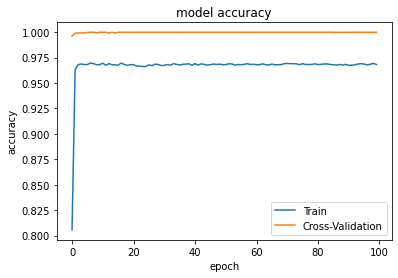

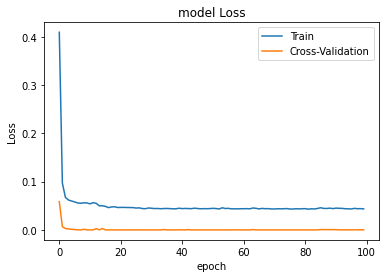

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding
from tensorflow.keras import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import numpy as np
import time
import time
start = time.time()
#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_shape = X_train[0].shape))  
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100, batch_size = 1024, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_cnn = model.predict(X_test)
y_preds_cnn1 = np.round(y_preds_cnn)
    

    #y_preds_cnn = model.predict(X_test)
    #y_preds_cnn = np.round(y_preds_cnn)
cm = confusion_matrix(y_test, y_preds_cnn1)
print(confusion_matrix(y_test, y_preds_cnn1))
print(accuracy_score(y_test, y_preds_cnn1))
print("Classification Report: \n", classification_report(y_test, y_preds_cnn1))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()  
endtest =time.time()
difftest = endtest-starttest

endtest =time.time()
#difftest = endtest-starttest
print("Training time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

***CNN-LSTM***

In [ ]:
###############LSTM###################################
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

import time

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

import seaborn as sns



lstm_output_size = 20
epochs = 10
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
#model.add(BatchNormalization())
model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.2))


model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))
    #])
model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100, batch_size = 512, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_cnn = model.predict(X_test)
y_preds_cnn1 = np.round(y_preds_cnn)
    

    #y_preds_cnn = model.predict(X_test)
    #y_preds_cnn = np.round(y_preds_cnn)
cm = confusion_matrix(y_test, y_preds_cnn1)
print(confusion_matrix(y_test, y_preds_cnn1))
print(accuracy_score(y_test, y_preds_cnn1))
print("Classification Report: \n", classification_report(y_test, y_preds_cnn1))




start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()  
endtest =time.time()
difftest = endtest-starttest

endtest =time.time()
#difftest = endtest-starttest
print("Training time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))


print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

Epoch 1/100
340/340 [==============================] - 11s 24ms/step - loss: 0.0101 - accuracy: 0.9974 - val_loss: 2.0682e-04 - val_accuracy: 1.0000
Epoch 2/100
340/340 [==============================] - 5s 15ms/step - loss: 7.0982e-04 - accuracy: 0.9999 - val_loss: 1.0764e-04 - val_accuracy: 1.0000
Epoch 3/100
340/340 [==============================] - 4s 13ms/step - loss: 3.0238e-04 - accuracy: 1.0000 - val_loss: 3.7496e-05 - val_accuracy: 1.0000
Epoch 4/100
340/340 [==============================] - 4s 12ms/step - loss: 1.1736e-04 - accuracy: 1.0000 - val_loss: 1.2618e-05 - val_accuracy: 1.0000
Epoch 5/100
340/340 [==============================] - 4s 12ms/step - loss: 6.2130e-05 - accuracy: 1.0000 - val_loss: 5.2947e-06 - val_accuracy: 1.0000
Epoch 6/100
340/340 [==============================] - 4s 12ms/step - loss: 4.2778e-05 - accuracy: 1.0000 - val_loss: 3.6467e-06 - val_accuracy: 1.0000
Epoch 7/100
340/340 [==============================] - 4s 13ms/step - loss: 2.9504e-05 - ac

***DNN***

In [ ]:
#from keras.layers import LSTM, SimpleRNN, GRU
#from keras.layers import Dense, Dropout, Activation, Embedding
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import numpy as np
import time
start = time.time()


# 1. define the network

model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(37,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
   
model.fit(X_train, y_train, epochs=50, batch_size = 20, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_cnn = model.predict(X_test)
y_preds_cnn = np.round(y_preds_cnn)
    

    #y_preds_cnn = model.predict(X_test)
    #y_preds_cnn = np.round(y_preds_cnn)
cm = confusion_matrix(y_test, y_preds_cnn)
print(confusion_matrix(y_test, y_preds_cnn))
print(accuracy_score(y_test, y_preds_cnn))
print("Classification Report: \n", classification_report(y_test, y_preds_cnn))



start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()  
endtest =time.time()
difftest = endtest-starttest

endtest =time.time()
#difftest = endtest-starttest
print("Training time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))

start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()  
endtest =time.time()
difftest = endtest-starttest

endtest =time.time()
#difftest = endtest-starttest
print("Training time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))


print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

# ***ICU-ENV centralized***

In [ ]:
import pandas as pd
df_ICU_ENV = pd.read_csv('/content/drive/MyDrive/ICU/clean_ICU.csv')
df_ICU_ENV.shape

(111882, 44)

In [ ]:
df_ICU_ENV.head()

,Unnamed: 0,frame.time_delta,frame.time_relative,frame.len,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,tcp.connection.fin,tcp.connection.rst,...,mqtt.qos,mqtt.retain,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,label,tcp.flags.ack,tcp.flags.fin
0,0,0.000000,0.000000,105.0,0x00000018,0.000000,37.0,1.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,6.0,64.0,0,1.0,0.0
1,1,0.000053,0.000053,72.0,0x00000018,0.000053,4.0,38.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,64.0,0,1.0,0.0
2,2,0.000043,0.000096,105.0,0x00000018,0.000000,37.0,1.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,6.0,64.0,0,1.0,0.0
3,3,0.000020,0.000116,72.0,0x00000018,0.000020,4.0,38.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,64.0,0,1.0,0.0
4,4,0.000016,0.000132,105.0,0x00000018,0.000000,37.0,1.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,6.0,64.0,0,1.0,0.0


In [ ]:
df_ICU_ENV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111882 entries, 0 to 111881
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             111882 non-null  int64  
 1   frame.time_delta       111882 non-null  float64
 2   frame.time_relative    111882 non-null  float64
 3   frame.len              111882 non-null  float64
 4   tcp.flags              111882 non-null  object 
 5   tcp.time_delta         111882 non-null  float64
 6   tcp.len                111882 non-null  float64
 7   tcp.ack                111882 non-null  float64
 8   tcp.connection.fin     111882 non-null  float64
 9   tcp.connection.rst     111882 non-null  float64
 10  tcp.connection.sack    111882 non-null  float64
 11  tcp.connection.syn     111882 non-null  float64
 12  tcp.flags.ack          111882 non-null  int64  
 13  tcp.flags.fin          111882 non-null  int64  
 14  tcp.flags.push         111882 non-nu

In [ ]:
df_ICU_ENV['tcp.flags.urg'].value_counts()

0.0    111882
Name: tcp.flags.urg, dtype: int64

In [ ]:
col = ['Unnamed: 0','tcp.flags', 'tcp.checksum', 'mqtt.hdrflags', 'tcp.flags.ack', 'tcp.flags.fin', 'mqtt.willmsg_len', 'mqtt.conflag.willflag'
, 'mqtt.conflag.retain', 'mqtt.conflag.reserved', 'mqtt.conflag.qos', 'mqtt.conflag.passwd', 'mqtt.conack.val', 'tcp.flags.urg']
df_ICU_ENV = df_ICU_ENV.drop(columns=col, axis=1)
df_ICU_ENV.shape

(111882, 30)

In [ ]:
df_ICU_ENV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188694 entries, 0 to 188693
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        188694 non-null  int64  
 1   frame.time_delta  188694 non-null  float64
 2   tcp.time_delta    188694 non-null  float64
 3   tcp.flags.ack     188694 non-null  int64  
 4   tcp.flags.push    188694 non-null  int64  
 5   tcp.flags.reset   188694 non-null  int64  
 6   mqtt.hdrflags     188694 non-null  int64  
 7   mqtt.msgtype      188694 non-null  float64
 8   mqtt.qos          188694 non-null  float64
 9   mqtt.retain       188694 non-null  float64
 10  mqtt.ver          188694 non-null  float64
 11  label             188694 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 17.3 MB


In [ ]:
df_ICU_ENV.to_csv('/content/drive/MyDrive/ICU/clean_ICU.csv')

In [ ]:
#count_FL_0, count_FL_1 = df_ICU_ENV.label.value_counts()


In [ ]:
#df_FL_0 = df_ICU_ENV[df_ICU_ENV['label'] == 0]
#df_FL_1 = df_ICU_ENV[df_ICU_ENV['label'] == 1]

In [ ]:
#df_FL_1_under = df_FL_1.sample(count_FL_0)
#df_FL_under = pd.concat([df_FL_1_under, df_FL_0], axis = 0)
#print('Random under-sampling:')
#print(df_FL_under.label.value_counts())

In [ ]:
#df_ENV_1_under = df_ENV_1.sample(count_ENV_0)
#df_ENV_under = pd.concat([df_ENV_1_under, df_ENV_0], axis = 0)
#print('Random under-sampling:')
#print(df_ENV_under.label.value_counts())

In [ ]:
X = df_ICU_ENV.drop('label', axis = 1)
y = df_ICU_ENV['label']
X.shape, y.shape

((111882, 29), (111882,))

In [ ]:
from imblearn.under_sampling import NearMiss
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=2)
# transform the dataset
X, y = undersample.fit_resample(X, y)

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#y1 = encoder.fit_transform(y)
#Y= pd.get_dummies(y1).values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

**LSTM**

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


100/100 [==============================] - 4s 23ms/step - loss: 0.7075 - accuracy: 0.4931 - val_loss: 0.6869 - val_accuracy: 0.6665
Epoch 2/100
100/100 [==============================] - 1s 13ms/step - loss: 0.6579 - accuracy: 0.5732 - val_loss: 0.5989 - val_accuracy: 0.6967
Epoch 3/100
100/100 [==============================] - 1s 13ms/step - loss: 0.5930 - accuracy: 0.6670 - val_loss: 0.5488 - val_accuracy: 0.7462
Epoch 4/100
100/100 [==============================] - 1s 13ms/step - loss: 0.5607 - accuracy: 0.6987 - val_loss: 0.5230 - val_accuracy: 0.7462
Epoch 5/100
100/100 [==============================] - 1s 12ms/step - loss: 0.5424 - accuracy: 0.7203 - val_loss: 0.5025 - val_accuracy: 0.7462
Epoch 6/100
100/100 [==============================] - 1s 13ms/step - loss: 0.5201 - accuracy: 0.7283 - val_loss: 0.4718 - val_accuracy: 0.7454
Epoch 7/100
100/100 [==============================] - 1s 12ms/step - loss: 0.4021 - accuracy: 0.8187 - val_loss: 0.1745 - val_accuracy: 0.9750
Epoc

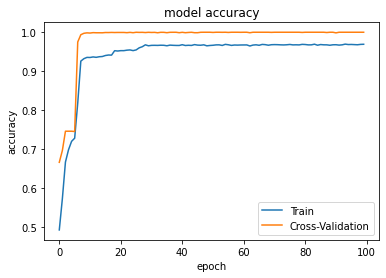

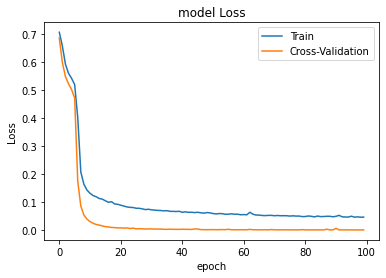

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding
from tensorflow.keras import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import numpy as np
import time
import time
start = time.time()
#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_shape = X_train[0].shape))  
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100, batch_size = 512, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_cnn = model.predict(X_test)
y_preds_cnn = np.round(y_preds_cnn)
    

    #y_preds_cnn = model.predict(X_test)
    #y_preds_cnn = np.round(y_preds_cnn)
cm = confusion_matrix(y_test, y_preds_cnn)
print(confusion_matrix(y_test, y_preds_cnn))
print(accuracy_score(y_test, y_preds_cnn))
print("Classification Report: \n", classification_report(y_test, y_preds_cnn))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()  
endtest =time.time()
difftest = endtest-starttest

endtest =time.time()
#difftest = endtest-starttest
print("Training time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

**DNN**

In [ ]:
#from keras.layers import LSTM, SimpleRNN, GRU
#from keras.layers import Dense, Dropout, Activation, Embedding
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import numpy as np
import time
start = time.time()


# 1. define the network

model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(37,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
   
model.fit(X_train, y_train, epochs=50, batch_size = 20, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_cnn = model.predict(X_test)
y_preds_cnn = np.round(y_preds_cnn)
    

    #y_preds_cnn = model.predict(X_test)
    #y_preds_cnn = np.round(y_preds_cnn)
cm = confusion_matrix(y_test, y_preds_cnn)
print(confusion_matrix(y_test, y_preds_cnn))
print(accuracy_score(y_test, y_preds_cnn))
print("Classification Report: \n", classification_report(y_test, y_preds_cnn))



start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()  
endtest =time.time()
difftest = endtest-starttest

endtest =time.time()
#difftest = endtest-starttest
print("Training time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2541/2541 [==============================] - 10s 3ms/step - loss: 0.2727 - accuracy: 0.9954 - val_loss: 0.0058 - val_accuracy: 0.9985
Epoch 2/50
2541/2541 [==============================] - 6s 2ms/step - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.0061 - val_accuracy: 0.9985
Epoch 3/50
2541/2541 [==============================] - 6s 2ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0064 - val_accuracy: 0.9985
Epoch 4/50
2541/2541 [==============================] - 5s 2ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0059 - val_accuracy: 0.9985
Epoch 5/50
2541/2541 [==============================] - 6s 2ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0059 - val_accuracy: 0.9985
Epoch 6/50
2541/2541 [==============================] - 6s 2ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0058 - val_accuracy: 0.9985
Epoch 7/50
2541/2541 [==============================] - 6s 2ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0061 - val_accuracy: 0.9985
Ep

**CNN-LSTM**

In [ ]:
###############LSTM###################################
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

import time

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

import seaborn as sns



lstm_output_size = 20
epochs = 10
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
#model.add(BatchNormalization())
model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.2))


model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))
    #])
model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
   
model.fit(X_train, y_train, epochs=100, batch_size = 1024, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_cnn = model.predict(X_test)
y_preds_cnn = np.round(y_preds_cnn)
    

    #y_preds_cnn = model.predict(X_test)
    #y_preds_cnn = np.round(y_preds_cnn)
cm = confusion_matrix(y_test, y_preds_cnn)
print(confusion_matrix(y_test, y_preds_cnn))
print(accuracy_score(y_test, y_preds_cnn))
print("Classification Report: \n", classification_report(y_test, y_preds_cnn))



start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()  
endtest =time.time()
difftest = endtest-starttest

endtest =time.time()
#difftest = endtest-starttest
print("Training time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


50/50 [==============================] - 4s 59ms/step - loss: 0.1111 - accuracy: 0.9617 - val_loss: 0.0130 - val_accuracy: 0.9980
Epoch 2/100
50/50 [==============================] - 3s 54ms/step - loss: 0.0257 - accuracy: 0.9936 - val_loss: 0.0104 - val_accuracy: 0.9970
Epoch 3/100
50/50 [==============================] - 3s 53ms/step - loss: 0.0118 - accuracy: 0.9976 - val_loss: 0.0314 - val_accuracy: 0.9893
Epoch 4/100
50/50 [==============================] - 3s 55ms/step - loss: 0.0225 - accuracy: 0.9942 - val_loss: 0.0052 - val_accuracy: 0.9984
Epoch 5/100
50/50 [==============================] - 3s 58ms/step - loss: 0.0441 - accuracy: 0.9910 - val_loss: 0.0104 - val_accuracy: 0.9980
Epoch 6/100
50/50 [==============================] - 3s 55ms/step - loss: 0.0092 - accuracy: 0.9983 - val_loss: 0.0059 - val_accuracy: 0.9984
Epoch 7/100
50/50 [==============================] - 3s 56ms/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.0102 - val_accuracy: 0.9985
Epoch 8/100
50/50 

# **CENTRALIZED ICU-PAITIENT DATASET PREPROCESSING**

In [ ]:
import numpy as np  
import pandas as pd
import os 
from sklearn.model_selection import train_test_split

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/ICU-Patient/patientMonitoring.csv')
df2.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (26,28,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['frame.time_delta', 'frame.time_relative', 'frame.len', 'ip.src',
       'ip.dst', 'tcp.srcport', 'tcp.dstport', 'tcp.flags', 'tcp.time_delta',
       'tcp.len', 'tcp.ack', 'tcp.connection.fin', 'tcp.connection.rst',
       'tcp.connection.sack', 'tcp.connection.syn', 'tcp.flags.ack',
       'tcp.flags.fin', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.syn',
       'tcp.flags.urg', 'tcp.hdr_len', 'tcp.payload', 'tcp.pdu.size',
       'tcp.window_size_value', 'tcp.checksum', 'mqtt.clientid',
       'mqtt.clientid_len', 'mqtt.conack.flags', 'mqtt.conack.val',
       'mqtt.conflag.passwd', 'mqtt.conflag.qos', 'mqtt.conflag.reserved',
       'mqtt.conflag.retain', 'mqtt.conflag.willflag', 'mqtt.conflags',
       'mqtt.dupflag', 'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg',
       'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.topic',
       'mqtt.topic_len', 'mqtt.ver', 'mqtt.willmsg_len', 'ip.proto', 'ip.ttl',
       'class', 'label'],
      dtype='object')

In [ ]:
import os
path = '/content/drive/MyDrive/ICU-Patient/'
csvs = os.listdir(path)
csvs

['patientMonitoring.csv', 'Attack.csv']

In [ ]:
df2 = pd.DataFrame()

In [ ]:
for csv in csvs:
  print(f'---- Reading {csv} ----')
  df = pd.read_csv(path+csv)
  print(f'df.shape: {df.shape}')
  empty_cols = [col for col in df.columns if df[col].isnull().all()]
  print(f'empty_cols: {len(empty_cols)}')
  print(empty_cols)
  df.fillna(0, inplace=True)
  df2 = df2.append(df, ignore_index=True)
  print(f'df2.shape: {df2.shape}')

---- Reading patientMonitoring.csv ----


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (26,28,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


df.shape: (76810, 52)
empty_cols: 0
[]
df2.shape: (76810, 52)
---- Reading Attack.csv ----
df.shape: (80126, 52)
empty_cols: 0
[]
df2.shape: (156936, 52)


In [ ]:
df2.head()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
0,0.000000,0.000000,105,10.5.126.141,10.5.126.56,35161,1883,0x00000018,0.0,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0
1,0.000249,0.000249,105,10.5.126.143,10.5.126.56,34237,1883,0x00000018,0.0,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0
2,0.000037,0.000286,105,10.5.126.145,10.5.126.56,46623,1883,0x00000018,0.0,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0
3,0.000034,0.000320,105,10.5.126.147,10.5.126.56,45663,1883,0x00000018,0.0,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0
4,0.000017,0.000337,105,10.5.126.141,10.5.126.56,38901,1883,0x00000018,0.0,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0


In [ ]:
feats = ['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport','mqtt.topic', 'mqtt.msg', 'tcp.payload','mqtt.clientid', 'mqtt.conflags', 'mqtt.conack.flags', 'class']

In [ ]:
df2.drop(labels=feats, axis=1, inplace=True)
df2.shape

(156936, 41)

In [ ]:
df2['label'].value_counts()

1    80126
0    76810
Name: label, dtype: int64

In [ ]:
df2.isnull().sum()

frame.time_delta         0
frame.time_relative      0
frame.len                0
tcp.flags                0
tcp.time_delta           0
tcp.len                  0
tcp.ack                  0
tcp.connection.fin       0
tcp.connection.rst       0
tcp.connection.sack      0
tcp.connection.syn       0
tcp.flags.ack            0
tcp.flags.fin            0
tcp.flags.push           0
tcp.flags.reset          0
tcp.flags.syn            0
tcp.flags.urg            0
tcp.hdr_len              0
tcp.pdu.size             0
tcp.window_size_value    0
tcp.checksum             0
mqtt.clientid_len        0
mqtt.conack.val          0
mqtt.conflag.passwd      0
mqtt.conflag.qos         0
mqtt.conflag.reserved    0
mqtt.conflag.retain      0
mqtt.conflag.willflag    0
mqtt.dupflag             0
mqtt.hdrflags            0
mqtt.kalive              0
mqtt.len                 0
mqtt.msgtype             0
mqtt.qos                 0
mqtt.retain              0
mqtt.topic_len           0
mqtt.ver                 0
m

In [ ]:
df2[df2.duplicated()].shape

(3, 41)

In [ ]:
df2 = df2.drop(df2[df2.duplicated()].index)

In [ ]:
df2[df2.duplicated()].shape

(0, 41)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156933 entries, 0 to 156935
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame.time_delta       156933 non-null  float64
 1   frame.time_relative    156933 non-null  float64
 2   frame.len              156933 non-null  int64  
 3   tcp.flags              156933 non-null  object 
 4   tcp.time_delta         156933 non-null  float64
 5   tcp.len                156933 non-null  int64  
 6   tcp.ack                156933 non-null  int64  
 7   tcp.connection.fin     156933 non-null  float64
 8   tcp.connection.rst     156933 non-null  float64
 9   tcp.connection.sack    156933 non-null  float64
 10  tcp.connection.syn     156933 non-null  float64
 11  tcp.flags.ack          156933 non-null  int64  
 12  tcp.flags.fin          156933 non-null  int64  
 13  tcp.flags.push         156933 non-null  int64  
 14  tcp.flags.reset        156933 non-nu

In [ ]:
df2['frame.len'] = df2['frame.len'].astype(float)
#df1['tcp.flags'] = df1['tcp.flags'].astype(float)
df2['tcp.len'] = df2['tcp.len'].astype(float)
df2['tcp.ack'] = df2['tcp.ack'].astype(float)
df2['tcp.flags.ack '] = df2['tcp.flags.ack'].astype(float)
df2['tcp.flags.fin '] = df2['tcp.flags.fin'].astype(float)
df2['tcp.flags.push'] = df2['tcp.flags.push'].astype(float)
df2['tcp.flags.reset'] = df2['tcp.flags.reset'].astype(float)
df2['tcp.flags.syn'] = df2['tcp.flags.syn'].astype(float)
df2['tcp.flags.urg'] = df2['tcp.flags.urg'].astype(float)
df2['tcp.hdr_len'] = df2['tcp.hdr_len'].astype(float)
df2['tcp.window_size_value'] = df2['tcp.window_size_value'].astype(float)
#df1['tcp.checksum'] = df1['tcp.checksum'].astype(float)

#df1['mqtt.hdrflags'] = df1['mqtt.hdrflags'].astype(float)
df2['ip.proto'] = df2['ip.proto'].astype(float)
df2['ip.ttl'] = df2['ip.ttl'].astype(float)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156933 entries, 0 to 156935
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame.time_delta       156933 non-null  float64
 1   frame.time_relative    156933 non-null  float64
 2   frame.len              156933 non-null  float64
 3   tcp.flags              156933 non-null  object 
 4   tcp.time_delta         156933 non-null  float64
 5   tcp.len                156933 non-null  float64
 6   tcp.ack                156933 non-null  float64
 7   tcp.connection.fin     156933 non-null  float64
 8   tcp.connection.rst     156933 non-null  float64
 9   tcp.connection.sack    156933 non-null  float64
 10  tcp.connection.syn     156933 non-null  float64
 11  tcp.flags.ack          156933 non-null  int64  
 12  tcp.flags.fin          156933 non-null  int64  
 13  tcp.flags.push         156933 non-null  float64
 14  tcp.flags.reset        156933 non-nu

In [ ]:
col = ['tcp.flags', 'tcp.checksum', 'mqtt.hdrflags', 'tcp.flags.ack', 'tcp.flags.fin']
df2 = df2.drop(columns=col)

In [ ]:
df2.to_csv('/content/drive/MyDrive/ICU-Patient/clean_ICU-PAI.csv')

In [ ]:
df_ICU_PAI1 = pd.read_csv('/content/drive/MyDrive/ICU-Patient/clean_ICU-PAI.csv')
df_ICU_PAI= df_ICU_PAI1.sample(frac=1, random_state = 13).reset_index(drop = True)

In [ ]:
import numpy as np
for i, df in enumerate(np.array_split(df_ICU_PAI, 5)):
    df.to_csv('/content/drive/MyDrive/ICU-Patient/'+f"ICU-Pai{i+1}.csv", index=False)

# **Centralized ICU-Patient**

In [ ]:
import pandas as pd
df_ICU_PAI = pd.read_csv('/content/drive/MyDrive/ICU-Patient/clean_ICU-PAI.csv')
df_ICU_PAI.shape

(156933, 39)

In [ ]:
df_ICU_PAI.head()

,Unnamed: 0,frame.time_delta,frame.time_relative,frame.len,tcp.time_delta,tcp.len,tcp.ack,tcp.connection.fin,tcp.connection.rst,tcp.connection.sack,...,mqtt.qos,mqtt.retain,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,label,tcp.flags.ack,tcp.flags.fin
0,0,0.000000,0.000000,105.0,0.0,37.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,6.0,64.0,0,1.0,0.0
1,1,0.000249,0.000249,105.0,0.0,37.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,6.0,64.0,0,1.0,0.0
2,2,0.000037,0.000286,105.0,0.0,37.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,6.0,64.0,0,1.0,0.0
3,3,0.000034,0.000320,105.0,0.0,37.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,6.0,64.0,0,1.0,0.0
4,4,0.000017,0.000337,105.0,0.0,37.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,6.0,64.0,0,1.0,0.0


In [ ]:
col = ['Unnamed: 0']
df_ICU_PAI = df_ICU_PAI.drop(columns=col, axis=1)
df_ICU_PAI.shape

(156933, 38)

In [ ]:
X = df_ICU_PAI.drop('label', axis = 1)
y = df_ICU_PAI['label']
X.shape, y.shape

((156933, 37), (156933,))

In [ ]:
from imblearn.under_sampling import NearMiss
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=2)
# transform the dataset
X, y = undersample.fit_resample(X, y)

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#y1 = encoder.fit_transform(y)
#Y= pd.get_dummies(y1).values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

**LSTM**

In [ ]:

from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding
from tensorflow.keras import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import numpy as np
import time

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_shape = X_train[0].shape))  
model.add(Dropout(0.5))
model.add(Dense(2))


model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))
 
model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
   
model.fit(X_train, y_train, epochs=100, batch_size = 1024, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_cnn = model.predict(X_test)
y_preds_cnn = np.round(y_preds_cnn)
    

    #y_preds_cnn = model.predict(X_test)
    #y_preds_cnn = np.round(y_preds_cnn)
cm = confusion_matrix(y_test, y_preds_cnn)
print(confusion_matrix(y_test, y_preds_cnn))
print(accuracy_score(y_test, y_preds_cnn))
print("Classification Report: \n", classification_report(y_test, y_preds_cnn))



start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()  
endtest =time.time()
difftest = endtest-starttest

endtest =time.time()
#difftest = endtest-starttest
print("Training time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))

Epoch 1/100
121/121 [==============================] - 39s 312ms/step - loss: 0.4844 - accuracy: 0.7811 - val_loss: 0.3773 - val_accuracy: 0.8359
Epoch 2/100
121/121 [==============================] - 2s 15ms/step - loss: 0.4016 - accuracy: 0.8140 - val_loss: 0.3354 - val_accuracy: 0.8361
Epoch 3/100
121/121 [==============================] - 2s 19ms/step - loss: 0.1497 - accuracy: 0.9370 - val_loss: 0.0185 - val_accuracy: 0.9974
Epoch 4/100
121/121 [==============================] - 2s 17ms/step - loss: 0.0691 - accuracy: 0.9633 - val_loss: 0.0140 - val_accuracy: 0.9978
Epoch 5/100
121/121 [==============================] - 2s 15ms/step - loss: 0.0603 - accuracy: 0.9664 - val_loss: 0.0118 - val_accuracy: 0.9983
Epoch 6/100
121/121 [==============================] - 2s 15ms/step - loss: 0.0584 - accuracy: 0.9672 - val_loss: 0.0124 - val_accuracy: 0.9978
Epoch 7/100
121/121 [==============================] - 2s 15ms/step - loss: 0.0597 - accuracy: 0.9658 - val_loss: 0.0109 - val_accurac

**DNN**

In [ ]:
#from keras.layers import LSTM, SimpleRNN, GRU
#from keras.layers import Dense, Dropout, Activation, Embedding
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import numpy as np
import time
start = time.time()
#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network

model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(37,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
   
model.fit(X_train, y_train, epochs=100, batch_size = 1024, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_cnn = model.predict(X_test)
y_preds_cnn = np.round(y_preds_cnn)
    

    #y_preds_cnn = model.predict(X_test)
    #y_preds_cnn = np.round(y_preds_cnn)
cm = confusion_matrix(y_test, y_preds_cnn)
print(confusion_matrix(y_test, y_preds_cnn))
print(accuracy_score(y_test, y_preds_cnn))
print("Classification Report: \n", classification_report(y_test, y_preds_cnn))



start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()  
endtest =time.time()
difftest = endtest-starttest

endtest =time.time()
#difftest = endtest-starttest
print("Training time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


121/121 [==============================] - 2s 7ms/step - loss: 0.0565 - accuracy: 0.9874 - val_loss: 0.0019 - val_accuracy: 0.9995
Epoch 2/100
121/121 [==============================] - 1s 8ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 3/100
121/121 [==============================] - 1s 8ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0021 - val_accuracy: 0.9995
Epoch 4/100
121/121 [==============================] - 1s 8ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0018 - val_accuracy: 0.9995
Epoch 5/100
121/121 [==============================] - 1s 7ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0018 - val_accuracy: 0.9995
Epoch 6/100
121/121 [==============================] - 1s 7ms/step - loss: 0.1730 - accuracy: 0.9899 - val_loss: 18.3599 - val_accuracy: 0.8949
Epoch 7/100
121/121 [==============================] - 1s 5ms/step - loss: 0.8443 - accuracy: 0.9936 - val_loss: 0.0066 - val_accuracy: 0.9995
Epoch 8/10

**CNN-LSTM**

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

import time

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

import seaborn as sns



lstm_output_size = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
#model.add(BatchNormalization())
model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.2))


model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))
    #])
model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
   
model.fit(X_train, y_train, epochs=100, batch_size = 1024, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_cnn = model.predict(X_test)
y_preds_cnn = np.round(y_preds_cnn)
    

    #y_preds_cnn = model.predict(X_test)
    #y_preds_cnn = np.round(y_preds_cnn)
cm = confusion_matrix(y_test, y_preds_cnn)
print(confusion_matrix(y_test, y_preds_cnn))
print(accuracy_score(y_test, y_preds_cnn))
print("Classification Report: \n", classification_report(y_test, y_preds_cnn))



start = time.time()
start_time = time.time()
end = time.time()
diff=end-start
starttest = time.time()  
endtest =time.time()
difftest = endtest-starttest

endtest =time.time()
#difftest = endtest-starttest
print("Training time: " + str(diff))
print("Test time: " + str(difftest))
time_required = time.time() - start_time
print('\nTIME: {}seconds'.format(time_required))


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


121/121 [==============================] - 5s 29ms/step - loss: 0.1034 - accuracy: 0.9683 - val_loss: 0.0251 - val_accuracy: 0.9978
Epoch 2/100
121/121 [==============================] - 3s 28ms/step - loss: 0.0218 - accuracy: 0.9953 - val_loss: 0.0118 - val_accuracy: 0.9980
Epoch 3/100
121/121 [==============================] - 3s 28ms/step - loss: 0.0124 - accuracy: 0.9980 - val_loss: 0.0110 - val_accuracy: 0.9981
Epoch 4/100
121/121 [==============================] - 3s 28ms/step - loss: 0.0114 - accuracy: 0.9981 - val_loss: 0.0097 - val_accuracy: 0.9982
Epoch 5/100
121/121 [==============================] - 3s 27ms/step - loss: 0.0111 - accuracy: 0.9981 - val_loss: 0.0098 - val_accuracy: 0.9979
Epoch 6/100
121/121 [==============================] - 3s 28ms/step - loss: 0.0115 - accuracy: 0.9977 - val_loss: 0.0094 - val_accuracy: 0.9983
Epoch 7/100
121/121 [==============================] - 3s 28ms/step - loss: 0.0098 - accuracy: 0.9982 - val_loss: 0.0083 - val_accuracy: 0.9983
Epoc